# Clustering
The dating profiles

### Importing Libraries and Data

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm
from csv import DictReader

In [2]:
# Loading in the cleaned DF
with open("pkl_files/userProfile.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5,3,4,1,3,6,7
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7,9,5,1,9,4,0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1,2,6,5,6,5,4
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5,2,7,8,2,6,6
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6,6,6,4,3,6,3
...,...,...,...,...,...,...,...,...
109,Bacon fan. Music aficionado. Twitter specialist. Certified coffeeaholic. Explorer.,9,7,2,8,8,2,5
110,Internet fanatic. Extreme social media lover. Professional student. Web trailblazer. Certified troublemaker. Entrepreneur. Award-winning thinker. Travel maven.,4,2,8,8,3,5,2
111,Social media fanatic. Zombie buff. Food geek. Lifelong entrepreneur. Evil bacon maven. Travel fan. Writer. Communicator. Friendly coffee enthusiast.,7,8,4,1,5,9,5
112,Lifelong bacon nerd. Passionate pop culture fanatic. Friendly beer ninja. Tv enthusiast. Writer. Evil food guru. Extreme music maven. Alcohol trailblazer.,1,9,2,9,6,8,0


## Scaling the Categories

In [3]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333
...,...,...,...,...,...,...,...,...
109,Bacon fan. Music aficionado. Twitter specialist. Certified coffeeaholic. Explorer.,1.000000,0.777778,0.222222,0.888889,0.888889,0.222222,0.555556
110,Internet fanatic. Extreme social media lover. Professional student. Web trailblazer. Certified troublemaker. Entrepreneur. Award-winning thinker. Travel maven.,0.444444,0.222222,0.888889,0.888889,0.333333,0.555556,0.222222
111,Social media fanatic. Zombie buff. Food geek. Lifelong entrepreneur. Evil bacon maven. Travel fan. Writer. Communicator. Friendly coffee enthusiast.,0.777778,0.888889,0.444444,0.111111,0.555556,1.000000,0.555556
112,Lifelong bacon nerd. Passionate pop culture fanatic. Friendly beer ninja. Tv enthusiast. Writer. Evil food guru. Extreme music maven. Alcohol trailblazer.,0.111111,1.000000,0.222222,1.000000,0.666667,0.888889,0.000000


## Vectorizing the Bios

In [4]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [5]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds

C:\Users\Nick Georgiou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,amateur,analyst,animals,apathy,avid,award,bacon,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
111,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
112,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,1.000000,0.777778,0.222222,0.888889,0.888889,0.222222,0.555556,0,1,0,...,0,0,0,0,0,0,0,0,0,0
110,0.444444,0.222222,0.888889,0.888889,0.333333,0.555556,0.222222,0,0,0,...,0,0,0,1,0,1,0,0,0,0
111,0.777778,0.888889,0.444444,0.111111,0.555556,1.000000,0.555556,0,0,0,...,0,0,0,0,0,0,0,1,1,0
112,0.111111,1.000000,0.222222,1.000000,0.666667,0.888889,0.000000,0,0,1,...,0,0,0,0,0,0,0,1,0,0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

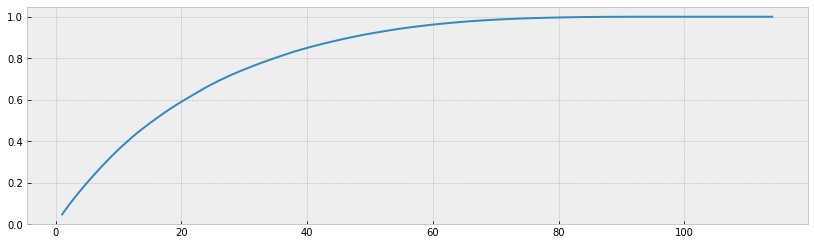

Number features: 72
Total Variance Explained: 0.9902181250071576


In [7]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [8]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9888695147343393

## Hierarchical Agglomerative Clustering

### Finding the Optimum Number of Clusters

In [9]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

C:\Users\NICKGE~1\AppData\Local\Temp/ipykernel_15888/3591206986.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


  0%|          | 0/18 [00:00<?, ?it/s]

### Plotting the Evaluation Scores for Different Evaluation Metrics

In [10]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

Max Value:
Cluster #    Cluster Score
2       3.329849

Min Value:
Cluster #     Cluster Score
19       2.566019


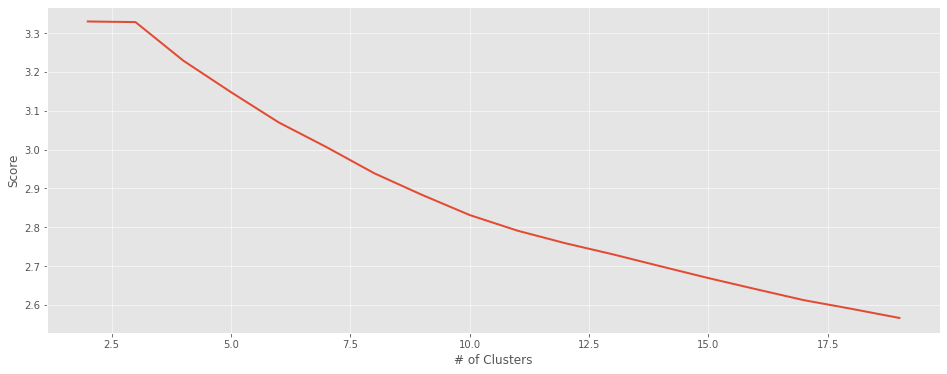

In [11]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

Max Value:
Cluster #    Cluster Score
2       0.105563

Min Value:
Cluster #    Cluster Score
3       0.014281


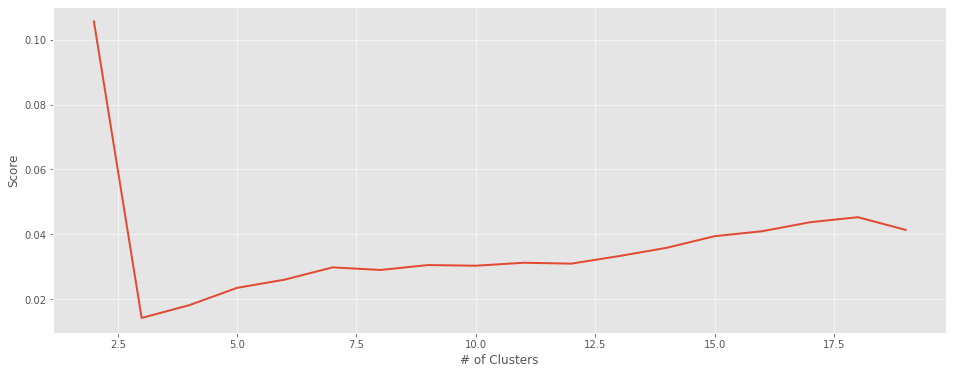

In [12]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

Max Value:
Cluster #    Cluster Score
4       4.234631

Min Value:
Cluster #    Cluster Score
2       1.922879


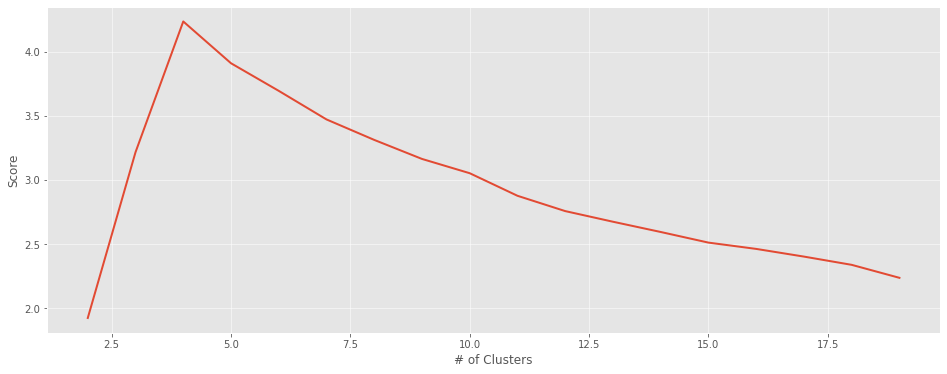

In [13]:
plot_evaluation(db_scores)

Based on two evaluation metrics, the best amount of clusters for this dataset is 12.

## Running the Final Clustering Algorithm

In [14]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [15]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0
...,...,...,...,...,...,...,...,...
109,Bacon fan. Music aficionado. Twitter specialist. Certified coffeeaholic. Explorer.,9.0,7.0,2.0,8.0,8.0,2.0,5.0
110,Internet fanatic. Extreme social media lover. Professional student. Web trailblazer. Certified troublemaker. Entrepreneur. Award-winning thinker. Travel maven.,4.0,2.0,8.0,8.0,3.0,5.0,2.0
111,Social media fanatic. Zombie buff. Food geek. Lifelong entrepreneur. Evil bacon maven. Travel fan. Writer. Communicator. Friendly coffee enthusiast.,7.0,8.0,4.0,1.0,5.0,9.0,5.0
112,Lifelong bacon nerd. Passionate pop culture fanatic. Friendly beer ninja. Tv enthusiast. Writer. Evil food guru. Extreme music maven. Alcohol trailblazer.,1.0,9.0,2.0,9.0,6.0,8.0,0.0


In [16]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0,2
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0,9
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,5
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0,9
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0,1
...,...,...,...,...,...,...,...,...,...
109,Bacon fan. Music aficionado. Twitter specialist. Certified coffeeaholic. Explorer.,9.0,7.0,2.0,8.0,8.0,2.0,5.0,4
110,Internet fanatic. Extreme social media lover. Professional student. Web trailblazer. Certified troublemaker. Entrepreneur. Award-winning thinker. Travel maven.,4.0,2.0,8.0,8.0,3.0,5.0,2.0,0
111,Social media fanatic. Zombie buff. Food geek. Lifelong entrepreneur. Evil bacon maven. Travel fan. Writer. Communicator. Friendly coffee enthusiast.,7.0,8.0,4.0,1.0,5.0,9.0,5.0,1
112,Lifelong bacon nerd. Passionate pop culture fanatic. Friendly beer ninja. Tv enthusiast. Writer. Evil food guru. Extreme music maven. Alcohol trailblazer.,1.0,9.0,2.0,9.0,6.0,8.0,0.0,1


### Exporting the Clustered Profiles

In [17]:
with open("pkl_files/clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

In [18]:
unpickle_file = open("pkl_files/clustered_profiles.pkl", "rb")
pickle.load(unpickle_file)

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0,2
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0,9
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,5
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0,9
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0,1
...,...,...,...,...,...,...,...,...,...
109,Bacon fan. Music aficionado. Twitter specialist. Certified coffeeaholic. Explorer.,9.0,7.0,2.0,8.0,8.0,2.0,5.0,4
110,Internet fanatic. Extreme social media lover. Professional student. Web trailblazer. Certified troublemaker. Entrepreneur. Award-winning thinker. Travel maven.,4.0,2.0,8.0,8.0,3.0,5.0,2.0,0
111,Social media fanatic. Zombie buff. Food geek. Lifelong entrepreneur. Evil bacon maven. Travel fan. Writer. Communicator. Friendly coffee enthusiast.,7.0,8.0,4.0,1.0,5.0,9.0,5.0,1
112,Lifelong bacon nerd. Passionate pop culture fanatic. Friendly beer ninja. Tv enthusiast. Writer. Evil food guru. Extreme music maven. Alcohol trailblazer.,1.0,9.0,2.0,9.0,6.0,8.0,0.0,1


In [19]:
with open("pkl_files/clustered_profiles.pkl", "rb") as f:
    object = pickle.load(f)
    
df = pd.DataFrame(object)
df.to_csv(r'compiled_csv/clustered_profiles.csv')

In [20]:
with open('compiled_csv/clustered_profiles.csv', 'r') as read_obj:
    csv_dict_reader = DictReader(read_obj)
    for row in csv_dict_reader:
        print("\n" + "A" + row['Cluster #'])


A2

A9

A5

A9

A1

A1

A0

A5

A10

A5

A8

A3

A6

A5

A0

A5

A2

A1

A4

A3

A9

A5

A2

A0

A4

A6

A0

A0

A10

A8

A8

A6

A9

A8

A8

A10

A11

A8

A1

A10

A5

A6

A5

A4

A10

A5

A1

A7

A3

A0

A10

A9

A0

A10

A6

A2

A0

A10

A6

A5

A2

A10

A11

A8

A3

A9

A8

A9

A0

A10

A11

A4

A3

A8

A1

A10

A5

A8

A5

A10

A10

A2

A11

A11

A5

A1

A6

A3

A6

A9

A3

A10

A10

A5

A2

A5

A2

A0

A11

A5

A7

A1

A11

A11

A4

A10

A4

A7

A7

A4

A0

A1

A1

A1


## Finding Users within their own Clusters
Sorting users so they match or are recommended to other similar users.

Example will be randomly using any of the clusters:

In [21]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

For Cluster Group # 11


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
36,Wannabe food trailblazer. Evil introvert. Student. Alcohol maven. Travel advocate. Troublemaker.,2.0,6.0,2.0,1.0,8.0,1.0,9.0
62,Professional twitter junkie. Travel advocate. Hardcore food aficionado. Explorer. Friendly coffee trailblazer. Reader.,6.0,4.0,9.0,2.0,1.0,2.0,9.0
70,Beer trailblazer. Reader. Travel geek. Total student. Musicaholic. Freelance organizer. Food lover.,0.0,9.0,6.0,3.0,0.0,7.0,6.0
82,Certified travel junkie. Gamer. Reader. Food maven. Extreme alcohol aficionado. Typical tv specialist.,1.0,6.0,3.0,0.0,0.0,0.0,0.0
83,Extreme travel practitioner. Gamer. Typical music buff. Food trailblazer. Beer lover. Bacon junkie.,9.0,3.0,5.0,8.0,9.0,1.0,5.0
98,Freelance thinker. Amateur music trailblazer. Travel practitioner. Coffee junkie. Pop culture scholar. Evil webaholic.,9.0,7.0,2.0,3.0,1.0,1.0,6.0
102,Food ninja. Twitter guru. Music practitioner. General gamer. Thinker. Travel junkie.,0.0,8.0,2.0,6.0,0.0,1.0,7.0
103,Entrepreneur. Typical travel advocate. General music trailblazer. Alcohol maven. Gamer.,5.0,4.0,2.0,8.0,4.0,7.0,6.0


### Vectorizing the Bios only in the Selected Cluster

In [22]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

C:\Users\Nick Georgiou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,amateur,bacon,beer,buff,certified,coffee,culture,...,thinker,total,trailblazer,travel,troublemaker,tv,twitter,typical,wannabe,webaholic
36,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0,1,0
62,1,1,0,0,0,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,0
70,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
82,0,1,1,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
83,0,0,0,0,1,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
98,0,0,0,1,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,0,1
102,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
103,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [23]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
group

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,thinker,total,trailblazer,travel,troublemaker,tv,twitter,typical,wannabe,webaholic
36,2.0,6.0,2.0,1.0,8.0,1.0,9.0,1,0,1,...,0,0,1,1,1,0,0,0,1,0
62,6.0,4.0,9.0,2.0,1.0,2.0,9.0,1,1,0,...,0,0,1,1,0,0,1,0,0,0
70,0.0,9.0,6.0,3.0,0.0,7.0,6.0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
82,1.0,6.0,3.0,0.0,0.0,0.0,0.0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
83,9.0,3.0,5.0,8.0,9.0,1.0,5.0,0,0,0,...,0,0,1,1,0,0,0,1,0,0
98,9.0,7.0,2.0,3.0,1.0,1.0,6.0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
102,0.0,8.0,2.0,6.0,0.0,1.0,7.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
103,5.0,4.0,2.0,8.0,4.0,7.0,6.0,1,0,1,...,0,0,1,1,0,0,0,1,0,0


### Finding Correlation among the Users

In [24]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group

,36,62,70,82,83,98,102,103
36,1.000000,0.634820,0.566298,0.336211,0.657880,0.607629,0.626178,0.622661
62,0.634820,1.000000,0.681576,0.430937,0.643389,0.732929,0.604593,0.613929
70,0.566298,0.681576,1.000000,0.588189,0.374201,0.549716,0.763451,0.662377
82,0.336211,0.430937,0.588189,1.000000,0.230646,0.457456,0.514966,0.216357
83,0.657880,0.643389,0.374201,0.230646,1.000000,0.696559,0.478172,0.775358
98,0.607629,0.732929,0.549716,0.457456,0.696559,1.000000,0.648765,0.670824
102,0.626178,0.604593,0.763451,0.514966,0.478172,0.648765,1.000000,0.668179
103,0.622661,0.613929,0.662377,0.216357,0.775358,0.670824,0.668179,1.000000


## Finding the Top 10 Similar users
For a random dating profile

In [25]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

print("hi", corr_group.index[1], "total", corr_group.size)

Top 10 most similar users to User # 103 

          103
83   0.775358
98   0.670824
102  0.668179
70   0.662377
36   0.622661
62   0.613929
82   0.216357

The most similar user to User # 103 is User # 83
hi 62 total 64
